# ECV: Enfermedades Cardio Vasculares

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se estima que se cobran 17,9 millones de vidas cada año, lo que representa aproximadamente el 32% de todas las muertes a nivel mundial. Las ECV son un grupo de trastornos del corazón y los vasos sanguíneos que incluyen enfermedades coronarias, enfermedades cerebrovasculares, enfermedades cardíacas reumáticas y otras afecciones. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años.

# Diccionario de Datos:

- `age`: La edad del paciente.
- `sex`: El sexo del paciente (1 para masculino, 0 para femenino).
- `chest pain type`: El tipo de dolor de pecho experimentado por el paciente.
- `resting bp s`: La presión arterial sistólica en reposo del paciente.
- `cholesterol`: El nivel de colesterol en sangre del paciente.
- `fasting blood sugar`: El nivel de azúcar en sangre en ayunas (1 si el nivel de azúcar en sangre es mayor que 120 mg/dl, 0 en caso contrario).
- `resting ecg`: El resultado del electrocardiograma en reposo.
- `max heart rate`: La máxima frecuencia cardíaca alcanzada.
- `exercise angina`: Si el paciente experimenta angina inducida por el ejercicio (1 si sí, 0 si no).
- `oldpeak`: La depresión del segmento ST inducida por el ejercicio en relación con el descanso.
- `ST slope`: La pendiente del segmento ST durante el ejercicio.
- `target`: La variable objetivo que indica si el paciente tiene alguna condición médica (1 si sí, 0 si no).

In [1]:
### # Importarmos las Librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Búsqueda en cuadrícula
from sklearn.model_selection import GridSearchCV
# Balanceo de datos
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Media y la desviación estándar utilizadas en las características
from sklearn.preprocessing import StandardScaler
# Libreria para SVM
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
# Libreria para separar los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para las métricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Libreria para balanceo de los datos
from sklearn.utils import resample
# Libreria para cambio de datos
from sklearn.preprocessing import LabelEncoder

In [2]:
### Instalar la librería eli5 para selección de características
%pip install eli5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Se carga el conjunto de datos desde un archivo CSV con separación por punto y coma
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv", sep=";")

# Muestra las primeras 5 filas del dataframe para una vista previa
data.head()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood sugar,resting_ecg,max_heart_rate,exerciseangina,oldpeak,STslope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Imprimr la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exerciseangina       1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  STslope              1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
# Verificar valores faltantes
print(data.isnull().sum())

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood sugar    0
resting_ecg            0
max_heart_rate         0
exerciseangina         0
oldpeak                0
STslope                0
target                 0
dtype: int64


Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood sugar', 'resting_ecg', 'max_heart_rate',
       'exerciseangina', 'oldpeak', 'stslope', 'target'],
      dtype='object')


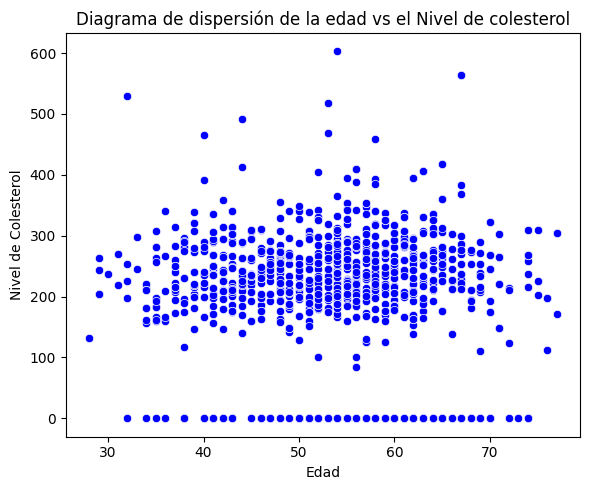

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos correctamente con separador ;
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv', sep=';')

# Limpiar nombres de columnas
data.columns = data.columns.str.strip().str.lower()

# Verifica los nombres ya corregidos
print(data.columns)

# Graficar
plt.figure(figsize=(6, 5))
sns.scatterplot(x='age', y='cholesterol', data=data, color='blue', marker='o')
plt.xlabel('Edad')
plt.ylabel('Nivel de Colesterol')
plt.title('Diagrama de dispersión de la edad vs el Nivel de colesterol')
plt.tight_layout()
plt.show()


In [7]:
# Asegurce de que los nombres  de columna están limpios
data.columns = data.columns.str.strip()

# Imprimir el nombre exacto (para confirmar coincidencia)
for col in data.columns:
    if col.startswith('chest'):
        print(f"Columna detectada: '{col}'")


Columna detectada: 'chest_pain_type'


Columnas detectadas:
Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood sugar', 'resting_ecg', 'max_heart_rate',
       'exerciseangina', 'oldpeak', 'STslope', 'target'],
      dtype='object')
Número de columnas: 12


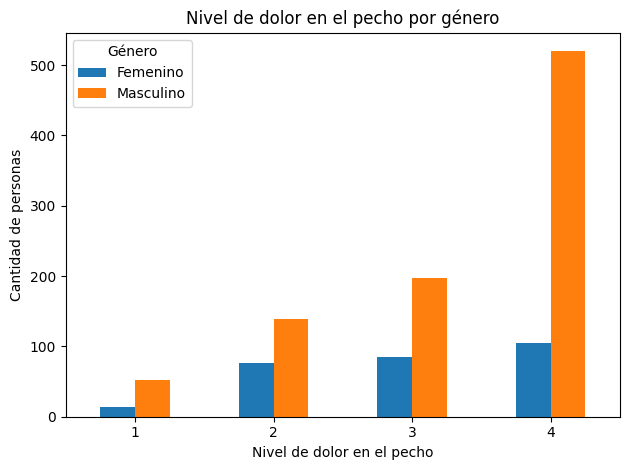

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Se cargar el archivo CSV con separador ;
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv', sep=';') 

# Aca se debe de verificar cuántas columnas tiene y cómo se llaman
print("Columnas detectadas:")
print(data.columns)
print(f"Número de columnas: {len(data.columns)}")

# Renombrar columnas (ajustado si el archivo tiene exactamente 13 columnas)
data.columns = ['age', 'sex', 'cp', 'resting_bp', 'cholesterol', 'fbs',
                'resting_ecg', 'max_hr', 'ex_angina', 'oldpeak', 'st_slope', 'target']

# Filtrar personas con dolor en el pecho (cp != 0)
chest_pain_data = data[data['cp'] != 0]

# Agrupar por tipo de dolor y sexo
chest_pain_by_gender = chest_pain_data.groupby(['cp', 'sex']).size().unstack()

# Graficar
ax = chest_pain_by_gender.plot(kind='bar', stacked=False)
ax.set_xlabel('Nivel de dolor en el pecho')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Nivel de dolor en el pecho por género')
ax.set_xticks(range(len(chest_pain_by_gender)))
ax.set_xticklabels(chest_pain_by_gender.index, rotation=0)
ax.legend(title='Género', labels=['Femenino', 'Masculino'])
plt.tight_layout()
plt.show()


In [9]:
# Contar el número de personas con la condición médica (variable objetivo)
personas_con_condicion = data['target'].sum()
print("Número de personas con riesgo de muerte (condición médica):", personas_con_condicion)

Número de personas con riesgo de muerte (condición médica): 629


In [10]:
# Separar características numéricas y categóricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Características numéricas:")
print(numeric_features)

print("\nCaracterísticas categóricas:")
print(categorical_features)

Características numéricas:
['age', 'sex', 'cp', 'resting_bp', 'cholesterol', 'fbs', 'resting_ecg', 'max_hr', 'ex_angina', 'oldpeak', 'st_slope', 'target']

Características categóricas:
[]


In [11]:
# Verificar datos faltantes
missing_data = data.isna().sum()

print("Datos faltantes:")
print(missing_data)

Datos faltantes:
age            0
sex            0
cp             0
resting_bp     0
cholesterol    0
fbs            0
resting_ecg    0
max_hr         0
ex_angina      0
oldpeak        0
st_slope       0
target         0
dtype: int64


In [12]:
data.dtypes

age              int64
sex              int64
cp               int64
resting_bp       int64
cholesterol      int64
fbs              int64
resting_ecg      int64
max_hr           int64
ex_angina        int64
oldpeak        float64
st_slope         int64
target           int64
dtype: object

In [13]:
### Se cuentan los registros para la columna clase
data['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [14]:
### Se realiza el balanceo de los datos (oversample)
df_cero = data[ data['target'] == 0 ]
df_uno = data[ data['target'] == 1 ]

df_oversample_cero = resample(df_cero,
                       replace=True,
                       n_samples=629,
                       random_state = 1)

df_oversample_uno = resample(df_uno,
                       replace=True,
                       n_samples=629,
                       random_state = 1)

df = pd.concat( [df_oversample_cero, df_oversample_uno] )

df['target'].value_counts()

target
0    629
1    629
Name: count, dtype: int64

In [15]:
# Se genera las estadísticas del DataFrame
df.describe()

,age,sex,cp,resting_bp,cholesterol,fbs,resting_ecg,max_hr,ex_angina,oldpeak,st_slope,target
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,53.846582,0.768680,3.226550,132.445151,212.005564,0.216216,0.697933,139.718601,0.375994,0.893164,1.589825,0.500000
std,9.371303,0.421844,0.925392,17.974186,98.681462,0.411827,0.879002,26.191942,0.484571,1.060584,0.603852,0.500199
min,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,193.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,4.000000,130.000000,230.000000,0.000000,0.000000,141.000000,0.000000,0.500000,2.000000,0.500000
75%,61.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,1.000000


#### Se crea el set de entrenamiento y de pruebas (80% entrenamiento y 20% pruebas)


In [16]:
from sklearn.model_selection import train_test_split


features = ['age', 'sex', 'cp', 'resting_bp', 'cholesterol',
            'fbs', 'resting_ecg', 'max_hr', 'ex_angina', 'oldpeak', 'st_slope']

# Variables predictoras y objetivo
X = df[features]
y = df['target'].values

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("✅ Conjunto de datos preparado correctamente.")


✅ Conjunto de datos preparado correctamente.


In [117]:
### Se genera el proceso de selección de mejores caractarísticas
# Se define el algoritmo DT
dt = DecisionTreeClassifier()

# Se entrena el modelo
dt.fit(X_train, y_train)

# Se genera la predicción
predict = dt.predict(X_test)

# Eli5
from eli5 import show_weights
show_weights(dt, feature_names = features)

Weight,Feature
0.3800,ST slope
0.1433,chest pain type
0.1030,max heart rate
0.0895,oldpeak
0.0660,age
0.0596,resting bp s
0.0532,sex
0.0410,cholesterol
0.0402,fasting blood sugar
0.0186,exercise angina


# 4. Realice la predicción con al menos dos algoritmos y utilice tres métricas para evaluar el modelo.

# 80% entrenamiento y 20% pruebas DT

In [24]:
# Limpio los nombres de columnas (quita espacios al inicio y final)
df.columns = df.columns.str.strip()

# Defino las características con los nombres correctos según tu DataFrame
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Verifico cuáles columnas están realmente en el DataFrame
missing = [col for col in features if col not in df.columns]

if missing:
    print(f"Error: Las siguientes columnas no están en el DataFrame: {missing}")
else:
    # Selecciono las columnas
    X = df[features]

    # Variable objetivo
    y = df['target'].values

    # Divido en entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [25]:
# Limpio espacios de los nombres de columnas
df.columns = df.columns.str.strip()

# Imprimo las columnas para referencia (puedes comentar luego)
print("Columnas del DataFrame:", df.columns.tolist())

# Diccionario de mapeo de nombres
nombre_columnas_corregidas = {  
    'ST slope': 'st_slope',
    'max heart rate': 'max_hr',
    'chest pain type': 'cp',
    'oldpeak': 'oldpeak'
}

# Construyo lista de features con nombres corregidos si existen
features = []
for col in ['ST slope', 'max heart rate', 'chest pain type', 'oldpeak']:
    nuevo_nombre = nombre_columnas_corregidas.get(col, col)
    if nuevo_nombre in df.columns:
        features.append(nuevo_nombre)
    else:
        print(f"Atención: '{nuevo_nombre}' no está en el DataFrame")

if len(features) == 0:
    raise ValueError("No se encontró ninguna columna válida para usar como características")

# Selecciono las columnas
X = df[features]

# Variable objetivo
y = df['target'].values

# Divido en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Columnas del DataFrame: ['age', 'sex', 'cp', 'resting_bp', 'cholesterol', 'fbs', 'resting_ecg', 'max_hr', 'ex_angina', 'oldpeak', 'st_slope', 'target']


In [21]:
### Se genera la predicción Arbol de decision con hiperparámetros

### Hiperparámetros con GridSearch
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier()

# Parámetros
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
min_samples_split = [ 2, 5, 10]


grid = dict(criterion = criterion,
            splitter = splitter,
            min_samples_split = min_samples_split)

grid_search = GridSearchCV(estimator = dt,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
dt = bestModel

# Se entrena el modelo con los mejores parámetros
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
dt_hprecision80_20 = round(precision_score(y_test, pred, average='weighted'), 2)
print("Precisión: ",dt_hprecision80_20)
dt_hrecall80_20 = round(recall_score(y_test, pred, average='weighted'),2)
print("Recall: ",dt_hrecall80_20)
dt_hf180_20 = round(f1_score(y_test, pred, average='weighted'),2)
print("F1-Score: ",dt_hf180_20)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameters (GridSearch): DecisionTreeClassifier(min_samples_split=10, splitter='random')
-----------------------------------------------------------
[[109  22]
 [ 17 104]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       131
           1       0.83      0.86      0.84       121

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252

Precisión:  0.85
Recall:  0.85
F1-Score:  0.85


#### Se crea el set de entrenamiento y de pruebas (70% entrenamiento y 30% pruebas) DT

In [27]:
# Limpio espacios en los nombres de columnas, por si acaso
df.columns = df.columns.str.strip()

# Selecciono las columnas correctas, que existen en tu DataFrame
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Selecciono las características
X = df[features]

# Variable objetivo
y = df['target'].values

# Divido en entrenamiento y prueba (30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [28]:
### Se genera la predicción Arbol de decision sin hiperparámetros
# Se selecciona el algoritmo
dt = DecisionTreeClassifier()

# Se entrena el algoritmo
dt.fit(X_train, y_train)

# Se genera la predicción
predict = dt.predict(X_test)

# Se imprimen las métricas

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
dt_Precision70_30 = round(precision_score(y_test, predict),2)
print("Precisión:", dt_Precision70_30)
dt_Recall70_30 = round(recall_score(y_test, predict),2)
print("Recall:", dt_Recall70_30)
dt_f170_30 = round(f1_score(y_test, predict),2)
print("F1-Score:", dt_f170_30)

[[180  10]
 [ 10 178]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       190
           1       0.95      0.95      0.95       188

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378

Precisión: 0.95
Recall: 0.95
F1-Score: 0.95


### Se genera la predicción Arbol de decision con hiperparámetros 70% - 30%

In [29]:
### Se genera la predicción Arbol de decision con hiperparámetros

### Hiperparámetros con GridSearch
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier()

# Parámetros
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
min_samples_split = [ 2, 5, 10]


grid = dict(criterion = criterion,
            splitter = splitter,
            min_samples_split = min_samples_split)

grid_search = GridSearchCV(estimator = dt,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
dt = bestModel

# Se entrena el modelo con los mejores parámetros
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
dt_hprecision70_30 = round(precision_score(y_test, pred, average='weighted'), 2)
print("Precisión: ",dt_hprecision70_30)
dt_hrecall70_30 = round(recall_score(y_test, pred, average='weighted'),2)
print("Recall: ",dt_hrecall70_30)
dt_hf170_30 = round(f1_score(y_test, pred, average='weighted'),2)
print("F1-Score: ",dt_hf170_30)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameters (GridSearch): DecisionTreeClassifier(splitter='random')
-----------------------------------------------------------
[[181   9]
 [ 11 177]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       190
           1       0.95      0.94      0.95       188

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378

Precisión:  0.95
Recall:  0.95
F1-Score:  0.95


# 80% entrenamiento y 20% pruebas NAIVE BAYES

In [31]:
# Limpio espacios en los nombres de columnas (por si acaso)
df.columns = df.columns.str.strip()

# Defino las características usando los nombres exactos que tiene el DataFrame
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Selecciono las características
X = df[features]

# Variable objetivo
y = df['target'].values

# División en entrenamiento y prueba 80% - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Se genera la predicción Naive Bayes sin hiperparámetros

In [32]:
# Se crea el modelo
nb = GaussianNB()

# Se entrena el algoritmo
nb.fit(X_train, y_train)

# Se genera la predicción
predict = nb.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
nb_precision80_20 = round(precision_score(y_test, predict),2)
print("Precisión:", nb_precision80_20)
nb_recall80_20 = round(recall_score(y_test, predict),2)
print("Recall:",nb_recall80_20)
nb_f180_20 = round(f1_score(y_test, predict),2)
print("F1-Score:", nb_f180_20 )

[[110  21]
 [ 16 105]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       131
           1       0.83      0.87      0.85       121

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252

Precisión: 0.83
Recall: 0.87
F1-Score: 0.85


# Se genera la predicción Naive Bayes con hiperparámetro 80-20

In [33]:
# Se crea el modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

#Parametros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

##extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
pred = nb.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Precisión
nb_hprecision80_20 = round(precision_score(y_test, pred), 2)
print("Precisión: ", nb_hprecision80_20)
# Recall
nb_hrecall80_20 = round(recall_score(y_test, pred),2)
print("Recall: ",nb_hrecall80_20)
# F1 score
nb_hf180_20 = round(f1_score(y_test, pred),2)
print("F1-Score: ",nb_hf180_20)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=np.float64(0.15199110829529336))
-----------------------------------------------------------
[[110  21]
 [ 17 104]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       131
           1       0.83      0.86      0.85       121

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252

Precisión:  0.83
Recall:  0.86
F1-Score:  0.85


# 70% entrenamiento y 30% pruebas NAIVE BAYES

In [35]:
# Limpio espacios en nombres de columnas
df.columns = df.columns.str.strip()

# Uso los nombres reales de las columnas
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Selecciono las características
X = df[features]

# Variable objetivo
y = df['target'].values

# Divido en entrenamiento y prueba (70% - 30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Se genera la predicción Naive Bayes sin hiperparámetros 70-30

In [36]:
#### Se genera la segunda predicción y se calculan las métricas (70% y 30%)

# Se crea el modelo
nb = GaussianNB()

# Se entrena el algoritmo
nb.fit(X_train, y_train)

# Se genera la predicción
predict = nb.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
nb_precision70_30 = round(precision_score(y_test, predict),2)
print("Precisión:", nb_precision70_30)
nb_recall70_30 = round(recall_score(y_test, predict),2)
print("Recall:",nb_recall70_30)
nb_f170_30 = round(f1_score(y_test, predict),2)
print("F1-Score:", nb_f170_30 )

[[163  27]
 [ 24 164]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       190
           1       0.86      0.87      0.87       188

    accuracy                           0.87       378
   macro avg       0.87      0.87      0.87       378
weighted avg       0.87      0.87      0.87       378

Precisión: 0.86
Recall: 0.87
F1-Score: 0.87


Se genera la predicción Naive Bayes con hiperparámetros 70-30

In [37]:
# Se crea el modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

#Parametros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

##extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
pred = nb.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Precisión
nb_hprecision70_30 = round(precision_score(y_test, pred), 2)
print("Precisión: ", nb_hprecision70_30)
# Recall
nb_hrecall70_30 = round(recall_score(y_test, pred),2)
print("Recall: ",nb_hrecall70_30)
# F1 score
nb_hf170_30 = round(f1_score(y_test, pred),2)
print("F1-Score: ",nb_hf170_30)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=np.float64(0.15199110829529336))
-----------------------------------------------------------
[[165  25]
 [ 24 164]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       190
           1       0.87      0.87      0.87       188

    accuracy                           0.87       378
   macro avg       0.87      0.87      0.87       378
weighted avg       0.87      0.87      0.87       378

Precisión:  0.87
Recall:  0.87
F1-Score:  0.87


# 80% entrenamiento y 20% pruebas SVC

In [39]:
# Limpio los nombres de las columnas para evitar espacios
df.columns = df.columns.str.strip()

# Defino las características usando los nombres que sí existen
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Selecciono las características
X = df[features]

# Variable objetivo
y = df['target'].values

# Divido en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Se genera la predicción SVC sin hiperparámetros 80-20

In [40]:
### Se genera la predicción
# Se selecciona el algoritmo
svc = SVC()

# Se entrena el algoritmo
svc.fit(X_train, y_train)

# Se genera la predicción
predict = svc.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

svc_presicion80_20 = round(precision_score(y_test, predict),2)
print("Precisión:", svc_presicion80_20)
svc_recall80_20 = round(recall_score(y_test, predict),2)
print("Recall:",svc_recall80_20)
svc_f180_20 = round(f1_score(y_test, predict),2)
print("F1-Score:",svc_f180_20)

[[97 34]
 [35 86]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       131
           1       0.72      0.71      0.71       121

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

Precisión: 0.72
Recall: 0.71
F1-Score: 0.71


Se genera la predicción SVC con hiperparámetros 80-20

In [41]:
 # Se crea el modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    # Definir rangos de valores para los hiperparámetros gamma y C
gamma_range = [0.001, 0.01, 0.1, 1, 10]
C_range = [0.1, 1, 10, 100]

svc = SVC()

grid = {'gamma': gamma_range, 'C': C_range}

    # Parámetros
grid_search = GridSearchCV(estimator=svc, param_grid=grid,
                           cv=10, verbose=1,
                           n_jobs=-1, scoring="accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

    # Extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Mejores Parametros (GridSearch):", bestModel)
print("-----------------------------------------------------------")

svc = bestModel

    # Se entrena el modelo
svc.fit(X_train, y_train)

    # Se genera la predicción
pred = svc.predict(X_test)

    # Matriz de confusión
print(confusion_matrix(y_test, pred))
    # Precisión
svc_hprecision80_20 = round(precision_score(y_test, pred), 2)
print("Precisión: ", svc_hprecision80_20)
    # Recall
svc_hrecall80_20 = round(recall_score(y_test, pred), 2)
print("Recall: ", svc_hrecall80_20)
# F1 score
svc_hf180_20 = round(f1_score(y_test, pred), 2)
print("F1-Score: ", svc_hf180_20)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores Parametros (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[119  12]
 [  9 112]]
Precisión:  0.9
Recall:  0.93
F1-Score:  0.91


# 70% entrenamiento y 30% pruebas SVC

In [43]:
# Limpio los nombres de las columnas por si acaso
df.columns = df.columns.str.strip()

# Defino las características con los nombres correctos
features = ['st_slope', 'max_hr', 'cp', 'oldpeak']

# Selecciono las características
X = df[features]

# Variable objetivo
y = df['target'].values

# Divido en entrenamiento (70%) y prueba (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Se genera la predicción SVC sin hiperparámetros 70-30

In [44]:
### Se genera la predicción
# Se selecciona el algoritmo
svc = SVC()

# Se entrena el algoritmo
svc.fit(X_train, y_train)

# Se genera la predicción
predict = svc.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

svc_presicion70_30 = round(precision_score(y_test, predict),2)
print("Precisión:", svc_presicion70_30)
svc_recall70_30 = round(recall_score(y_test, predict),2)
print("Recall:",svc_recall70_30)
svc_f170_30 = round(f1_score(y_test, predict),2)
print("F1-Score:",svc_f170_30)

[[134  56]
 [ 45 143]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       190
           1       0.72      0.76      0.74       188

    accuracy                           0.73       378
   macro avg       0.73      0.73      0.73       378
weighted avg       0.73      0.73      0.73       378

Precisión: 0.72
Recall: 0.76
F1-Score: 0.74


Se genera la predicción SVC con hiperparámetros 70-30

In [45]:
 # Se crea el modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    # Definir rangos de valores para los hiperparámetros gamma y C
gamma_range = [0.001, 0.01, 0.1, 1, 10]
C_range = [0.1, 1, 10, 100]

svc = SVC()

grid = {'gamma': gamma_range, 'C': C_range}

    # Parámetros
grid_search = GridSearchCV(estimator=svc, param_grid=grid,
                           cv=10, verbose=1,
                           n_jobs=-1, scoring="accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

    # Extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Mejores Parametros (GridSearch):", bestModel)
print("-----------------------------------------------------------")

svc = bestModel

    # Se entrena el modelo
svc.fit(X_train, y_train)

    # Se genera la predicción
pred = svc.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, pred))
# Precisión
svc_hprecision70_30 = round(precision_score(y_test, pred), 2)
print("Precisión: ", svc_hprecision70_30)
# Recall
svc_hrecall70_30 = round(recall_score(y_test, pred), 2)
print("Recall: ", svc_hrecall70_30)
# F1 score
svc_hf170_30 = round(f1_score(y_test, pred), 2)
print("F1-Score: ", svc_hf170_30)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores Parametros (GridSearch): SVC(C=1, gamma=10)
-----------------------------------------------------------
[[167  23]
 [ 14 174]]
Precisión:  0.88
Recall:  0.93
F1-Score:  0.9


# CONCLUSIÓN

## 1. ¿La pendiente es positiva, negativa o nula?

La pendiente observada es levemente positiva, ya que a medida que aumenta la edad (eje X), también se percibe una ligera elevación en los niveles de colesterol (eje Y). Sin embargo, esta relación no es fuerte ni constante, por lo cual la pendiente es poco pronunciada y sugiere una correlación débil pero existente.

## 2. ¿Hay necesidad de realizar la normalización?

La data no está tan separada, por lo que no es necesario normalizar. La eliminación de valores con colesterol igual a 0 y de casos extremos por encima de 500 se justifica, ya que estos puntos corresponden a errores de digitación o a datos atípicos no representativos del comportamiento general de la muestra. Su exclusión permite reducir el ruido estadístico y mejorar la calidad del análisis.

## 3. ¿Existen datos atípicos en la muestra y cuál es su impacto en el análisis?

Sí, se identifican datos atípicos en la muestra, tales como registros con niveles de colesterol igual a 0 y personas jóvenes con niveles extremadamente altos de colesterol (superiores a 500). Estos valores no corresponden con patrones fisiológicos normales, lo que sugiere errores en la recolección o digitación de datos. La presencia de estos outliers puede distorsionar los resultados estadísticos y visuales del análisis, por lo que es recomendable eliminarlos o tratarlos adecuadamente.

## 4. ¿Se evidencia homocedasticidad o heterocedasticidad en la relación entre la edad y el nivel de colesterol?

A partir del análisis del diagrama de dispersión entre la edad y el nivel de colesterol, se observa una distribución relativamente uniforme de los datos a lo largo del rango de edades. Esto indica que no existe un patrón claro de aumento o disminución en la dispersión de los valores, lo que sugiere la presencia de homocedasticidad. Es decir, los errores o residuales presentan una varianza constante, lo cual es un supuesto favorable para la aplicación de diversos modelos estadísticos, como la regresión lineal.



#  INTEGRANTES    

## PEDRO PABLO PAQUE CHARRY Y CARLOS DANIEL CULMA PERDOMO